In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [71]:
img = cv2.imread("tt2.jpg")

In [72]:
img.shape

(720, 1280, 3)

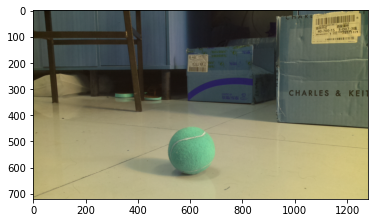

In [73]:
plt.imshow(img)

In [74]:
img = cv2.GaussianBlur(img, (5, 5), 5)

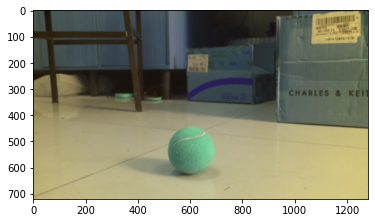

In [75]:
plt.imshow(img)

In [76]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

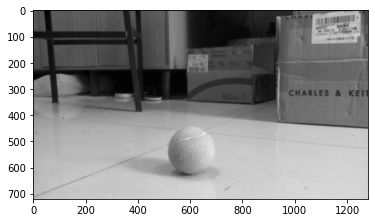

In [77]:
plt.imshow(gray_img, cmap=plt.cm.gray)

In [78]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

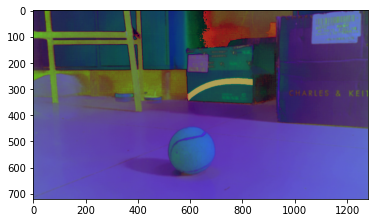

In [79]:
plt.imshow(hsv_img, cmap=plt.cm.hsv)

In [91]:
hist = img[440:620,520:700]

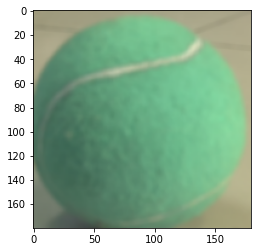

In [92]:
plt.imshow(hist)

In [93]:
hist = cv2.cvtColor(hist, cv2.COLOR_BGR2HSV)

In [94]:
hist_H = cv2.calcHist([hist], [0], None, [181], [0, 180])
hist_S = cv2.calcHist([hist], [1], None, [256], [0, 255])
hist_V = cv2.calcHist([hist], [2], None, [256], [0, 255])

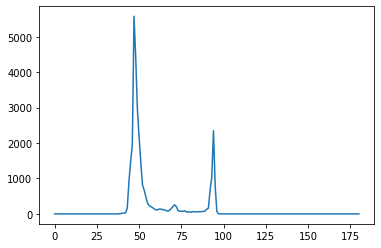

In [95]:
plt.plot(hist_H)

In [96]:
hist_H.shape

(181, 1)

In [97]:
hist_H[40:55]

array([[  20.],
       [  24.],
       [  27.],
       [ 163.],
       [ 916.],
       [1472.],
       [1947.],
       [5577.],
       [4416.],
       [2957.],
       [2167.],
       [1469.],
       [ 819.],
       [ 671.],
       [ 483.]], dtype=float32)

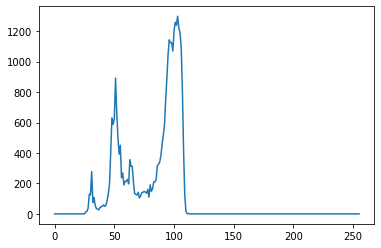

In [98]:
plt.plot(hist_S)

In [99]:
hist_S[70:110]

array([[ 142.],
       [ 105.],
       [ 118.],
       [ 139.],
       [ 142.],
       [ 148.],
       [ 143.],
       [ 136.],
       [ 161.],
       [ 110.],
       [ 191.],
       [ 148.],
       [ 165.],
       [ 210.],
       [ 210.],
       [ 226.],
       [ 316.],
       [ 326.],
       [ 340.],
       [ 381.],
       [ 457.],
       [ 515.],
       [ 583.],
       [ 751.],
       [ 890.],
       [1045.],
       [1143.],
       [1124.],
       [1124.],
       [1070.],
       [1199.],
       [1258.],
       [1239.],
       [1298.],
       [1220.],
       [1193.],
       [1098.],
       [ 816.],
       [ 416.],
       [ 120.]], dtype=float32)

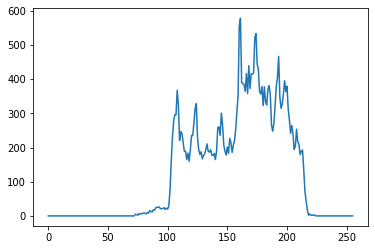

In [100]:
plt.plot(hist_V)

In [101]:
hist_V[160:200]

array([[556.],
       [579.],
       [390.],
       [388.],
       [384.],
       [365.],
       [417.],
       [358.],
       [440.],
       [373.],
       [416.],
       [415.],
       [419.],
       [522.],
       [534.],
       [445.],
       [428.],
       [365.],
       [357.],
       [379.],
       [323.],
       [378.],
       [334.],
       [325.],
       [371.],
       [382.],
       [355.],
       [267.],
       [248.],
       [271.],
       [322.],
       [379.],
       [405.],
       [467.],
       [349.],
       [315.],
       [327.],
       [358.],
       [396.],
       [364.]], dtype=float32)

In [24]:
lower = np.array([40, 90, 160])
higher = np.array([55, 110, 200])

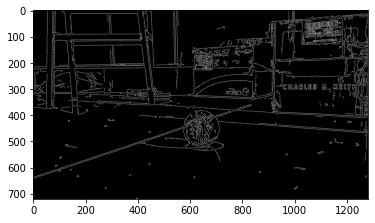

In [25]:
edge = cv2.Canny(gray_img, 5, 20)
plt.imshow(edge, cmap=plt.cm.gray)

In [26]:
circles = cv2.HoughCircles(edge, cv2.HOUGH_GRADIENT, 1, 60, param1=100, param2=40,minRadius=50, maxRadius=100)

In [27]:
circles.shape

(1, 4, 3)

In [28]:
import copy

4


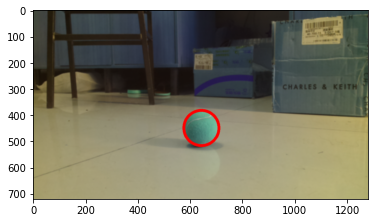

In [29]:
# fig, ax = plt.subplots(3, 4)
img_out = copy.copy(img)
if circles is not None:
    x = circles[0][:, 0].astype(int)
    y = circles[0][:, 1].astype(int)
    r = circles[0][:, 2].astype(int)
    s_r = (r/1.5).astype(int)
    num = len(circles[0])
    rate = np.zeros(num)
    print(num)
    for i in range(num):
        detect_area = (hsv_img[y[i]-s_r[i]:y[i]+s_r[i], x[i]-s_r[i]:x[i]+s_r[i]])
        # ax[i//5][i%5].imshow(detect_area, cmap=plt.cm.hsv)
        height, width, channel = detect_area.shape
        if height != 0 and width != 0:
            tennis_color_mask = cv2.inRange(detect_area, lower, higher)
            num_point = np.sum(tennis_color_mask/255)
            rate[i] = num_point / (height * width)
            #img_out = cv2.circle(img, (x[i], y[i]), r[i], (255, 0, 0), thickness=2)
            #ax[i//4][i%4].imshow(img_out)
    i = np.argmax(rate)
    x_pos = x[i]
    y_pos = y[i]
    radius = r[i]
img_out = cv2.circle(img_out, (x_pos, y_pos), radius, (255, 0, 0), thickness=10)
plt.imshow(img_out)
